<a href="https://colab.research.google.com/github/mleyvaz/computacion-paralela/blob/main/Dask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maikel Leyva
# Computación Paralela

In [ ]:
!pip install dask-cuda 

     |████████████████████████████████| 51kB 4.5MB/s 
     |████████████████████████████████| 665kB 9.5MB/s 
     |████████████████████████████████| 102kB 10.4MB/s 
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=51cc95930c99665006e8bd640486f4ae648544e08d529033202619330d5bf1c0
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built contextvars
ERROR: tensorflow-probability 0.11.0 has requirement cloudpickle==1.3, but you'll have cloudpickle 1.6.0 which is incompatible.
  Found existing installation: cloudpickle 1.3.0
    Uninstalling cloudpickle-1.3.0:
      Successfully uninstalled cloudpickle-1.3.0
  Found existing installation: distributed 1.25.3
    Uninstalling distributed-1.25.3:
      Successfully uninstalled distributed-1.25.3


In [ ]:
# Iniciar un clúster y conectar el cliente
from dask.distributed import LocalCluster, Client
cluster = LocalCluster()
client = Client(cluster)
#To see where the port of the dashboard is, use this command
print(client.scheduler_info()['services'])
# {'dashboard': 8787} --> means you can access it at localhost:8787

{'dashboard': 8787}


In [ ]:
from dask.distributed import Client
client = Client(n_workers=4, threads_per_worker=4)
client

/usr/local/lib/python3.6/dist-packages/distributed/node.py:155: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 43379 instead
  http_address["port"], self.http_server.port


Client Scheduler: tcp://127.0.0.1:37773 Dashboard: http://127.0.0.1:43379/status,Cluster Workers: 4 Cores: 16 Memory: 13.65 GB


In [ ]:
from dask import delayed, compute
import dask

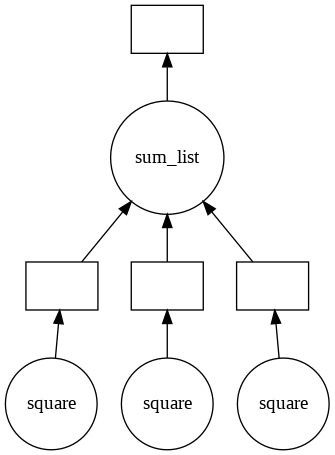

In [ ]:
@delayed
def square(num):
    print("square fn:", num)
    print()
    return num * num

@delayed
def sum_list(args):
    print("sum_list fn:", args)
    return sum(args)

items = [1, 2, 3]

computation_graph = sum_list([square(i) for i in items])

computation_graph.visualize()


In [ ]:
print("Result", computation_graph.compute())

Result 14
